## Credit Card Fraud Detection ML Project

## Introduction
In today's digital age, credit card transactions have become a part of our daily routine. While the convenience of quick payments is great, the risk of fraudulent activities is also increasing. Credit card fraud includes many illicit activities, such as unauthorized purchases and identity theft. The impact of such fraud is far-reaching, affecting not only individuals but also financial institutions and the overall economy.

To address this pressing issue, my project aims to develop a machine-learning model that can identify potentially fraudulent credit card transactions. By analyzing patterns and anomalies in transaction data, our model seeks to provide a robust security measure that enhances the trustworthiness of credit card transactions.

### Problem Statement
The goal is to build a fraud detection system that quickly and reliably spots illegal transactions while minimizing the inconvenience to customers by avoiding false positives.

### Opportunity
We want to build a model that can accurately anticipate fraud by using a comprehensive dataset from Kaggle. Our goal is to increase transaction security, reduce losses, and rebuild confidence in electronic payments so that credit card fraud will become less common in the future.

### Goals
- Preprocess and explore the dataset with features like transaction amount, location, time, and history.
- Split the dataset into training and testing sets & train models (logistic regression and decision trees) on labeled data.
- Evaluate models using precision, recall, and F1 score.
- Improve models by tuning hyperparameters.
- Accurately identify and prevent fraudulent credit card transactions.

### Introduction to Dataset
The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and includes 284,807 transactions. Among these transactions, 492 are fraudulent. Due to the significant class imbalance, special handling is required before building a model.

It is crucial for credit card companies to identify fraudulent transactions to prevent customers from being wrongly charged for items they did not purchase. The transactions were made by European cardholders in September 2013, spanning two days. The dataset contains:
- 284,807 transactions
- 492 fraudulent transactions, representing 0.172% of the total

The dataset includes only numerical input variables derived from a PCA transformation. Due to confidentiality concerns, the original features and additional background information are not provided. Features V1, V2, ..., V28 are the principal components obtained through PCA.

- **Time** and **Amount** are the only features not transformed by PCA. 
  - **Time** indicates the seconds elapsed between each transaction and the first transaction in the dataset.
  - **Amount** is the transaction amount, which can be used for example-dependent cost-sensitive learning.
- **Class** is the response variable, with 1 indicating fraud and 0 indicating a non-fraudulent transaction.

### Import Libraries

In [12]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import warnings
from IPython.display import HTML

# Ignore all warnings
warnings.filterwarnings('ignore')

#### Download Kaggle Dataset using API and Unzip it using Terminal 
- kaggle datasets download -d mlg-ulb/creditcardfraud
- unzip archive.zip -d "Fraud Detection ML System Capstone"

## Exploratory Data Analysis

In [15]:
# Load the CSV file into a DataFrame

df = pd.read_csv('Dataset/creditcard.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25   
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [16]:
df.shape

(284807, 31)

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Handling Missing Values

In [19]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no missing values present in the dataframe. Given that the entire dataset has been transformed using PCA, we assume that outliers have already been handled.

In [21]:
#Checking what are the datatype of our variables
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Distribution of Transaction Amount

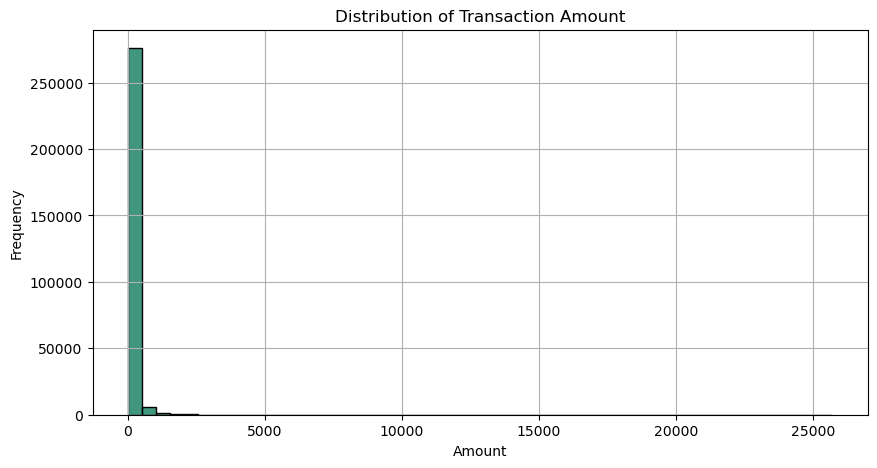

In [23]:
# Create the plot
plt.figure(figsize=(10, 5))

# Plot the histogram with the specified bar color
sns.histplot(df['Amount'], bins=50, color='#007451', kde=False)

# Add titles and labels
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Show grid
plt.grid(True)

# Save the plot as a file
plt.savefig('Distribution_of_Transaction_Amount.png')

# Display the plot
plt.show()

### Distribution of Transaction Amounts

The distribution of transaction amounts is skewed to the right, with most transactions being small and a few being very large.

#### Key Observations:

- **Right-Skewed Distribution:**
  - The distribution of transaction amounts is skewed to the right.
  - Most transactions are small, with a peak around 0, indicating many small transactions.
  - The frequency of high transactions decreases as the amount increases.
  
- **Influence of Large Transactions:**
  - The average transaction amount is influenced by a small number of large transactions.
  
- **Potential Factors:**
  - The distribution may be affected by different transaction types, outliers, or underlying economic factors.

### Distribution of Transaction Time

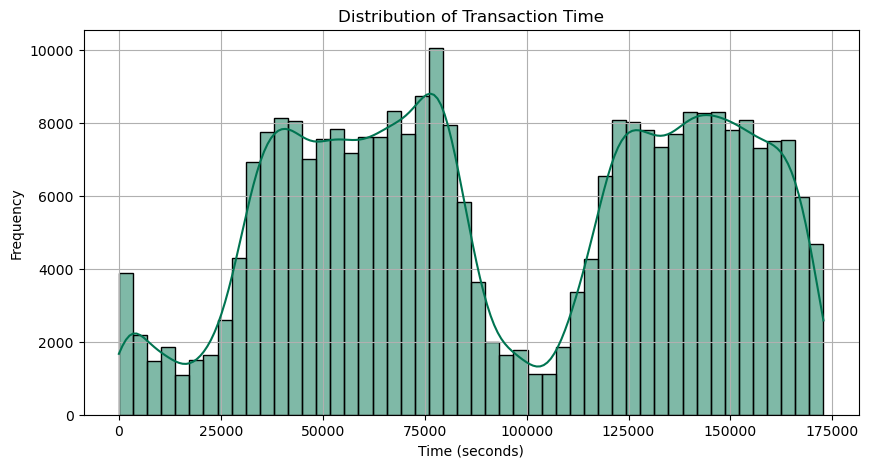

In [26]:
# Analyzing the transaction time
plt.figure(figsize=(10, 5))

# Plot the histogram with KDE and specified color
sns.histplot(df['Time'], bins=50, kde=True, color='#007451')

# Add titles and labels
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

# Show grid
plt.grid(True)

# Save the plot as a file
plt.savefig('Distribution_of_Transaction_Time.png')

# Display the plot
plt.show()

### Histogram of Transaction Times

The histogram of transaction times displays the frequency of transactions occurring at various times. On the x-axis, time is represented in seconds, while the y-axis shows the transaction frequency.

#### Key Observations:

- **Bimodal Distribution:** 
  - The histogram reveals a bimodal distribution, indicating two distinct peaks.
  - The first peak is around 80,000 seconds.
  - The second peak is around 130,000 seconds.
  - This implies that transactions are more likely to happen during these two specific time periods.

- **Right-Skewed Distribution:**
  - The distribution is right-skewed, meaning a higher frequency of transactions occurs at later times.
  - This suggests that transactions tend to cluster towards the end of the day or the end of the week.

### Distribution of Classes 

In [29]:
# Calculate the count of each class (0 for normal, 1 for fraudulent) in the 'Class' column
classes = df['Class'].value_counts()

# Calculate the percentage share of normal transactions
legitmate_share = round(classes[0] / df['Class'].count() * 100, 2)

# Calculate the percentage share of fraudulent transactions
fraud_share = round(classes[1] / df['Class'].count() * 100, 2)

# Print or return the calculated shares for analysis or reporting
print("Percentage of Legitmate transactions:", legitmate_share)
print("Percentage of fraudulent transactions:", fraud_share)

Percentage of Legitmate transactions: 99.83
Percentage of fraudulent transactions: 0.17


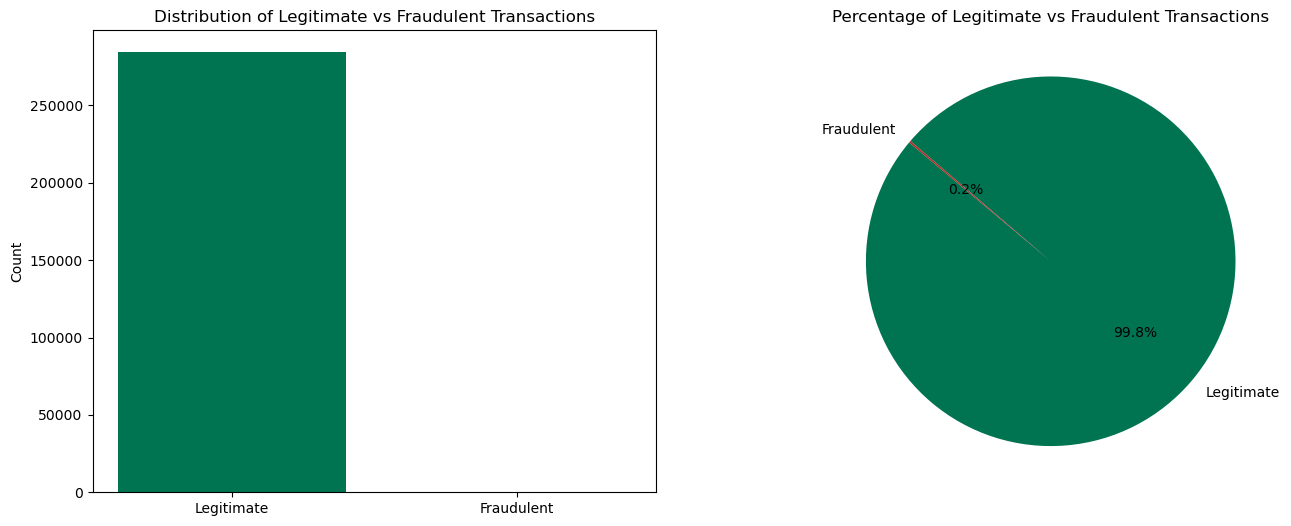

In [30]:
# Plotting the histograms side by side
plt.figure(figsize=(16, 6))

# Plotting the first histogram: Distribution based on counts
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.bar(['Legitimate', 'Fraudulent'], classes, color=['#007451', '#aa302b'])
plt.title('Distribution of Legitimate vs Fraudulent Transactions')
plt.ylabel('Count')

# Plotting the second pie chart: Distribution based on percentage
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
labels = ['Legitimate', 'Fraudulent']
sizes = [legitmate_share, fraud_share]
colors = ['#007451', '#aa302b']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Legitimate vs Fraudulent Transactions')

# Save the plot as a file
plt.savefig('Distribution_of_Legitimate_vs_Fraudulent_Transactions.png')

# Show plot
plt.show()

#### 99.83% of the transactions in the dataset are normal, while only 0.17% are fraudulent. This imbalance highlights the challenge of accurately detecting fraudulent transactions, which are significantly outnumbered by normal ones.

#### Now we will evaluate the TIME and AMOUNT DISTRBUTION CLASSES 

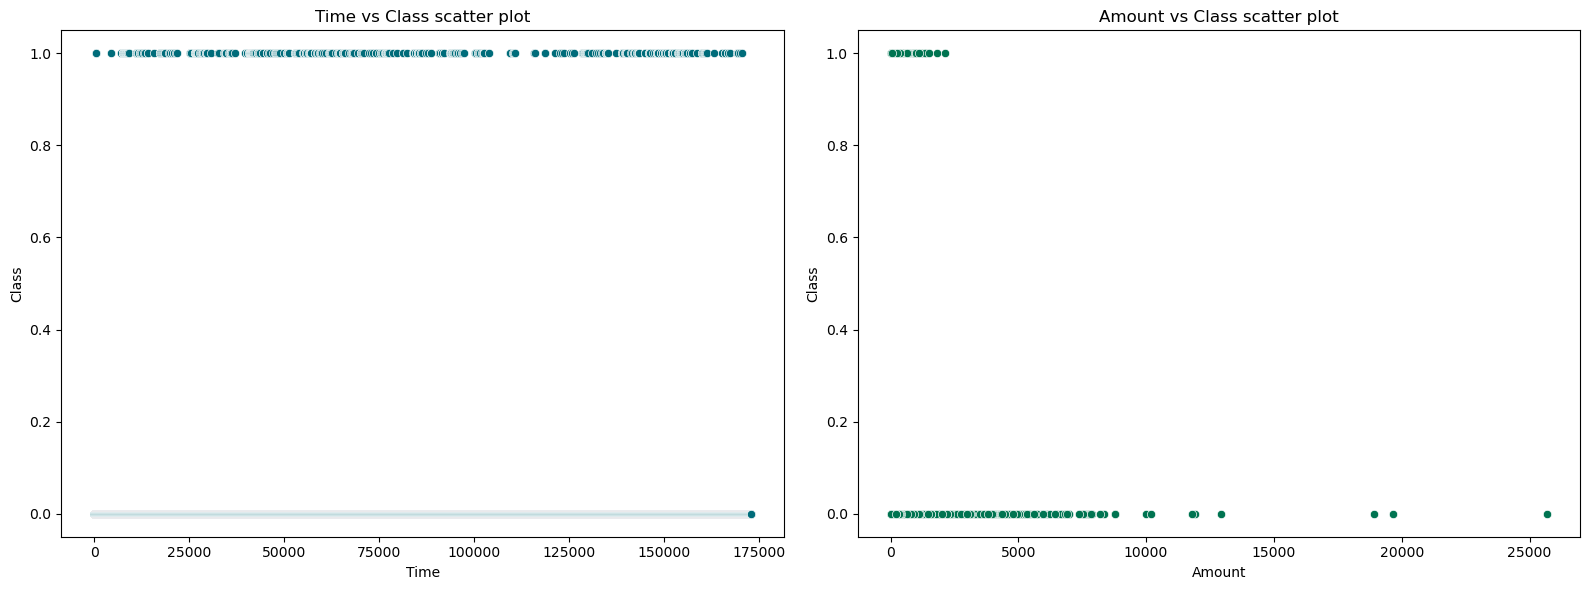

In [33]:
# Create subplots with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# Scatter plot: Time vs Class
plt.subplot(1, 2, 1)
sns.scatterplot(x="Time", y="Class",color='#006c7a', data=df)
plt.title("Time vs Class scatter plot")
plt.xlabel("Time")
plt.ylabel("Class")

# Scatter plot: Amount vs Class
plt.subplot(1, 2, 2)
sns.scatterplot(x="Amount", y="Class", color='#007451', data=df)
plt.title("Amount vs Class scatter plot")
plt.xlabel("Amount")
plt.ylabel("Class")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a file
plt.savefig('Distribution_of_Time_&Amount_vs_Fraudulent_Transactions.png')

# Show plot
plt.show()

#### The Time vs Class scatter plot reveals no useful information, as both types of transactions are evenly distributed over time. In contrast, when compared to the Amount plot, it is evident that lower amount transactions are more likely to be fraudulent than higher amount ones.

In [35]:
# I will go ahead and drop the time colom as it not important for model building
df = df.drop(columns=['Time'])

In [36]:
#Let see if time has been successfully dropped
print(df.columns)
#Time has been dropped

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


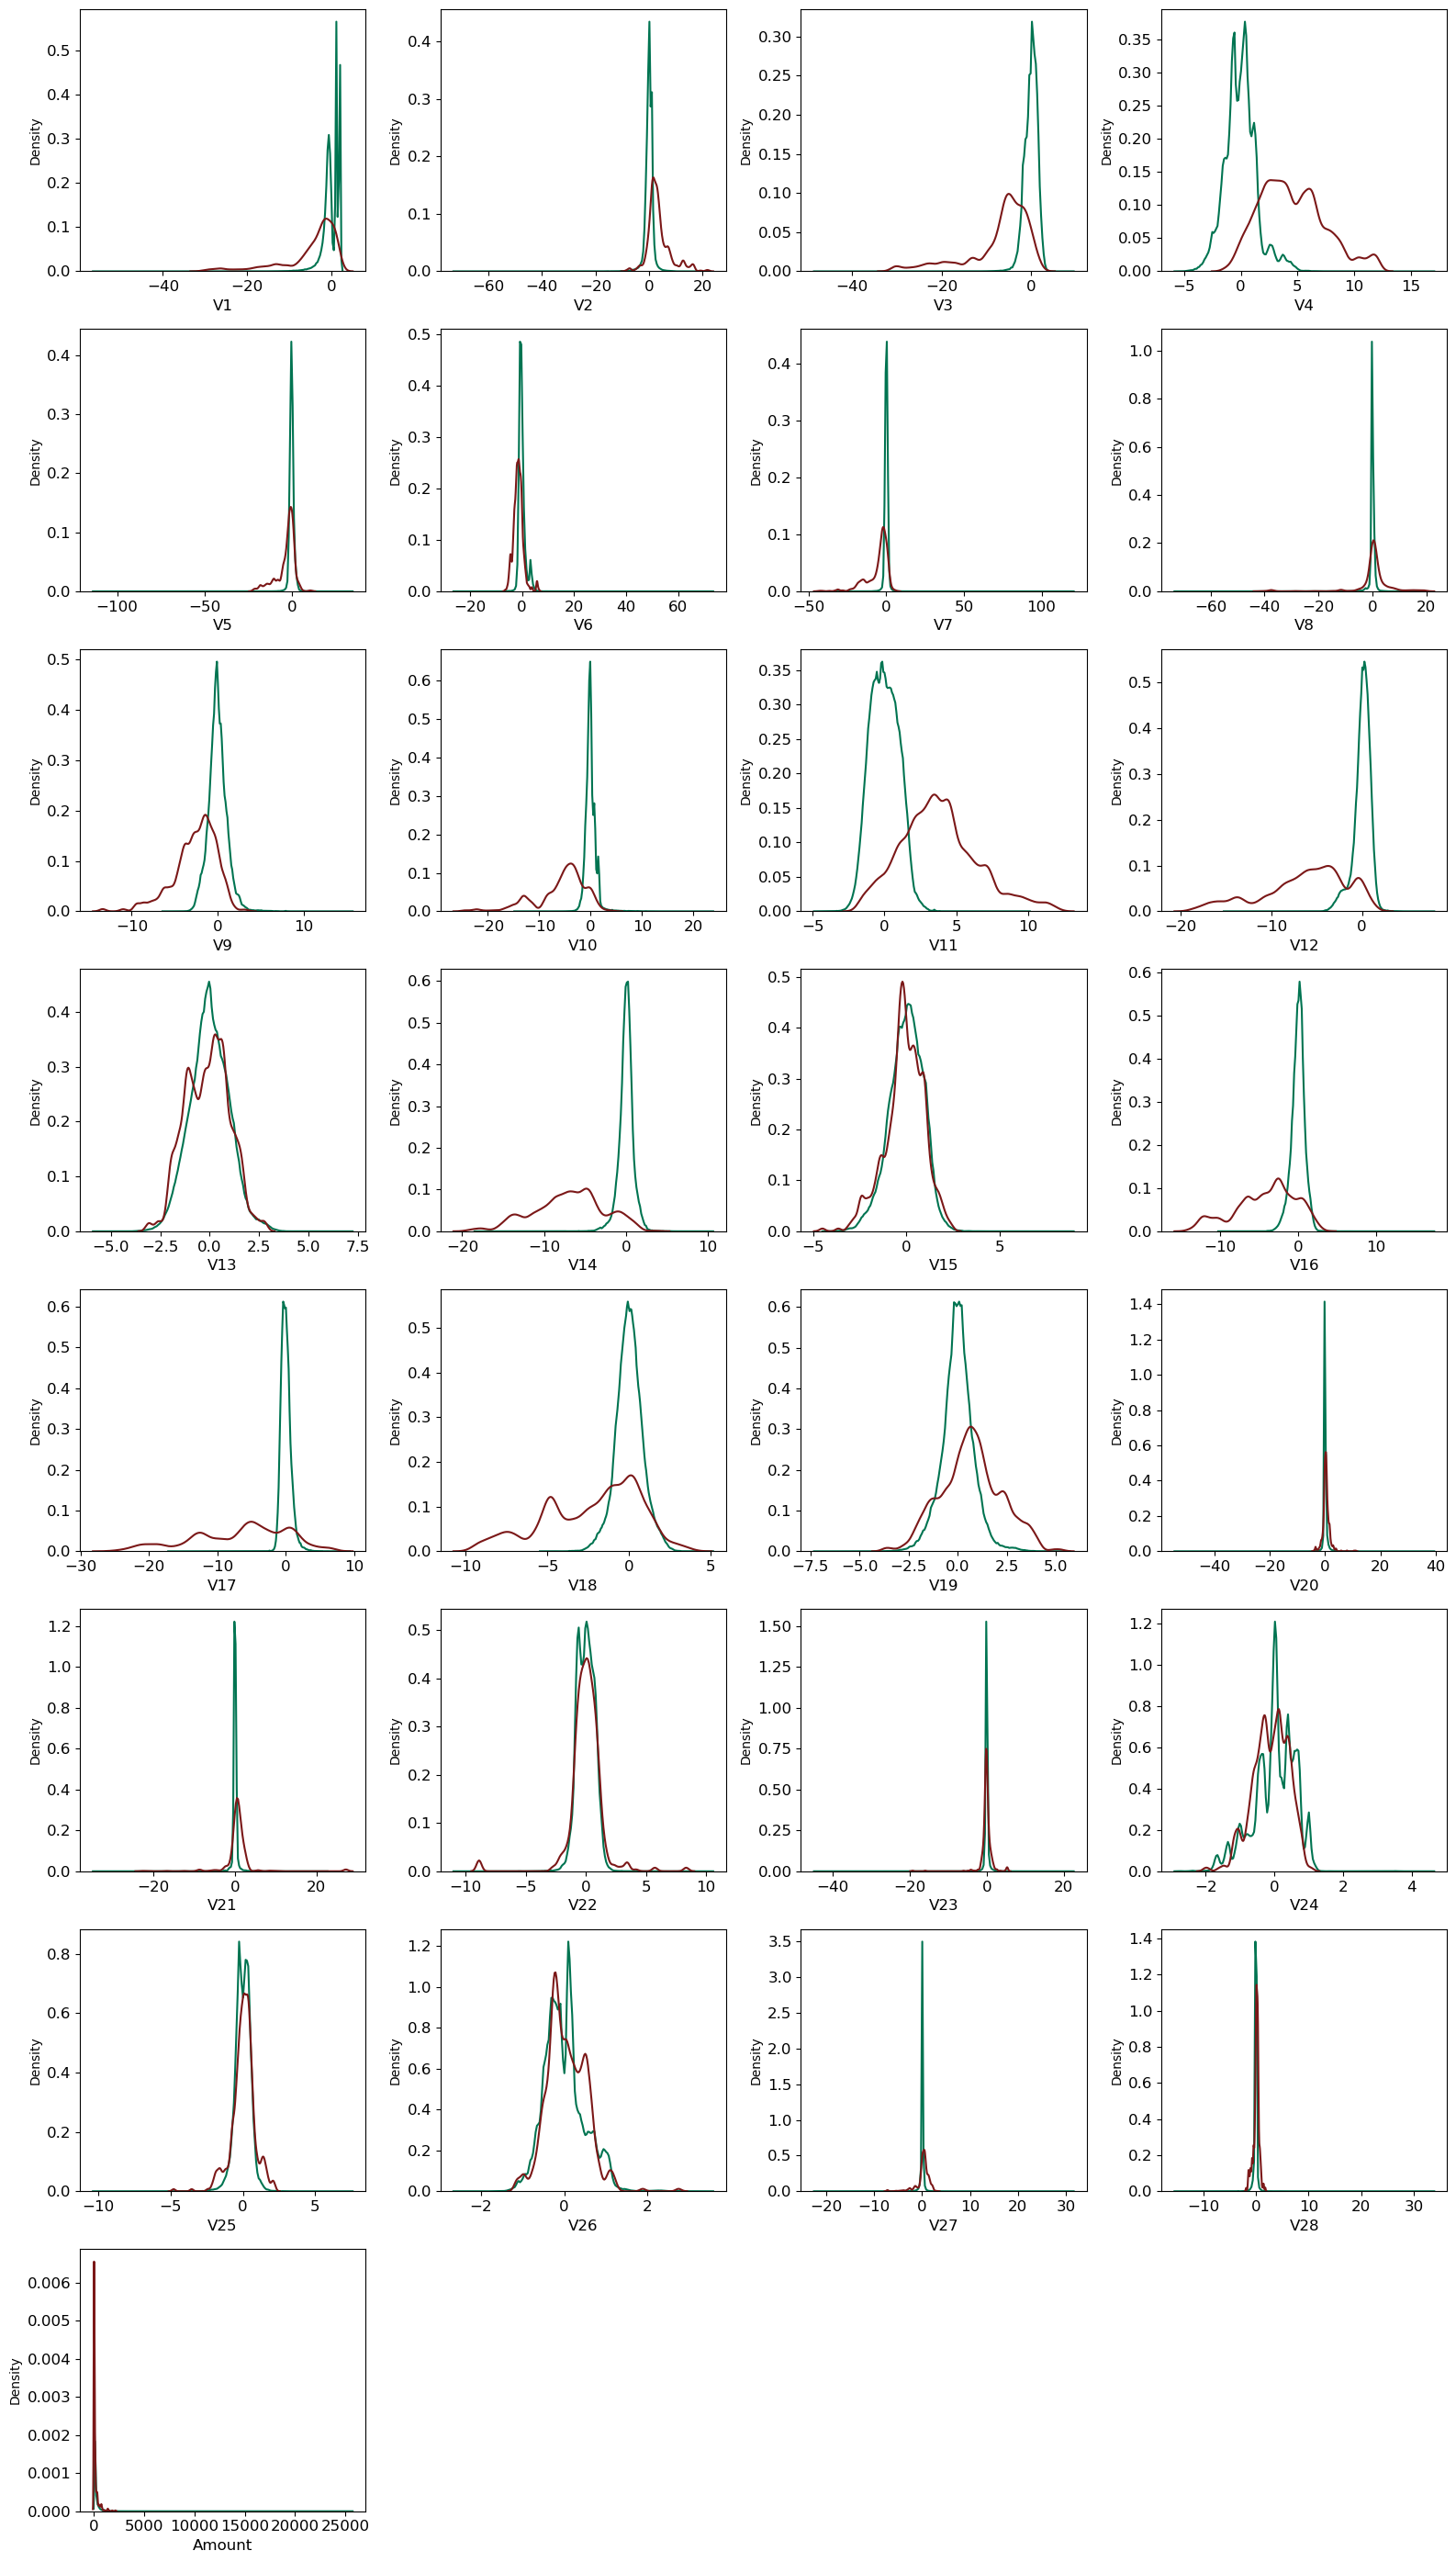

In [37]:
# Dropping 'Class' column from the list of columns
var = df.columns.drop("Class")

# Separating data based on class
t0 = df[df['Class'] == 0]
t1 = df[df['Class'] == 1]

plt.figure(figsize=(16, 28))

for i, feature in enumerate(var, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="0", color='#007451')
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="1", color='#7b1818')
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

#### We observe that the distributions of most features overlap significantly for both fraudulent and non-fraudulent transactions.

### Conclusion

### Exploratory Data Analysis (EDA) Summary

The EDA process has been completed by visualizing key features and using various graphs to better understand the data.

#### Key Findings:

- **Normal Transactions:** 99.83% of the transactions in the dataset are normal.
- **Fraudulent Transactions:** Only 0.17% of the transactions are fraudulent.
  - This translates to 492 fraudulent transactions out of 284,807 credit card transactions.

The significant class imbalance makes it challenging to accurately predict fraudulent transactions, as models will tend to favor predicting genuine transactions over fraudulent ones.

#### Next Steps:

1. **Model the Data:**
   - Use Logistic Regression to model the data.
2. **Balance the Data:**
   - Implement techniques to address the class imbalance.

## Modelling

#### Divide the Dataset and Train the Data

In [43]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (227845, 29)
Testing set shape: (56962, 29)


### Logistic Regression on Imbalanced Dataset

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [47]:
log_reg.score(X_train,y_train)

0.99923632293884

In [48]:
y_pred_log_reg = log_reg.predict(X_test)

In [49]:
# Print Logistic Regression Imbalanced Reports
print("Logistic Regression Imbalanced Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Imbalanced Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Logistic Regression: Imbalanced Dataset Performance

- **Accuracy:** The model has an accuracy of 100%, indicating that it correctly classified all instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for the legitimate class (Class 0) is 1.00, meaning that all instances predicted to be legitimate were actually legitimate.
- **Recall:** The recall for the legitimate class is 1.00, meaning that the model detected all legitimate instances.
- **F1-Score:** The F1-score for the legitimate class is 1.00, which is the harmonic mean of precision and recall, providing a balanced measure of both.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for the fraudulent class (Class 1) is 0.83, indicating that 83% of instances predicted to be fraudulent were actually fraudulent.
- **Recall:** The recall for the fraudulent class is 0.64, indicating that the model detected 64% of fraudulent instances.
- **F1-Score:** The F1-score for the fraudulent class is 0.73, which is the harmonic mean of precision and recall, providing a balanced measure of both.

### Decision Tree on Imbalanced Dataset

In [150]:
# Train Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [152]:
y_pred_dec_tree = dec_tree.predict(X_test)

In [154]:
print("Decision Tree Imbalanced Report:")
print(classification_report(y_test, y_pred_dec_tree))

Decision Tree Imbalanced Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.76      0.76        98

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



### Decision Tree: Imbalanced Dataset Performance

- **Accuracy:** The model has an accuracy of 100%, indicating that it correctly classified all instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for the legitimate class (Class 0) is 1.00, meaning that all instances predicted to be legitimate were actually legitimate.
- **Recall:** The recall for the legitimate class is 1.00, meaning that the model detected all legitimate instances.
- **F1-Score:** The F1-score for the legitimate class is 1.00, which is the harmonic mean of precision and recall, providing a balanced measure of both.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for the fraudulent class (Class 1) is 0.76, indicating that out of all the transactions predicted as fraudulent, 76% were actually fraudulent.
- **Recall:** The recall for the fraudulent class is 0.76, meaning that the model detected all fraudulent instances.
- **F1-Score:** The F1-score for the fraudulent class is 0.76 which is the harmonic mean of precision and recall, indicating a good balance between the two for fraudulent transactions.

The imbalanced datasets are a characteristic of the problem of credit card fraud detection. So, we must use a technique to balance the data. I used the two possible methods: under-sampling and upper-sampling. 

### Under Sampling

In [59]:
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

In [61]:
# Under sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [63]:
import pandas as pd
from IPython.display import display

original_class_distribution = y_train.value_counts()
under_sampled_class_distribution = y_train_under.value_counts()

# Check the new class distributions
class_distribution_df = pd.DataFrame({
    'Class': ['Legitimate (0)', 'Fraudulent (1)'],
    'Original Distribution': original_class_distribution.values,
    'Under Sampled Distribution': under_sampled_class_distribution.values
})

# Display the table
display(class_distribution_df)

,Class,Original Distribution,Under Sampled Distribution
0,Legitimate (0),227451,394
1,Fraudulent (1),394,394


### Data Distribution Overview

- **Original Distribution:**
  - The initial dataset had many more legitimate transactions (227,451) compared to fraudulent ones (394).

- **Under Sampled Distribution:**
  - After using Random UnderSampler to balance the data, the number of legitimate transactions was reduced to match the number of fraudulent transactions, resulting in 394 legitimate and 394 fraudulent transactions.

The **Random UnderSampler** technique reduces the number of samples in the majority class (legitimate transactions) to match the number of samples in the minority class (fraudulent transactions). This helps balance the dataset, making it easier for the machine learning model to learn and predict both classes accurately. However, it may lead to a loss of information since many legitimate transactions are removed.

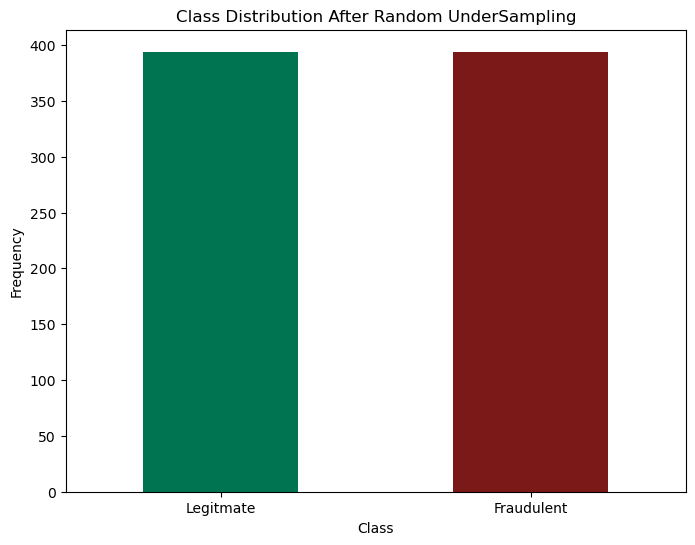

In [65]:
# Calculate the count of each class
class_counts = y_train_under.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['#007451', '#7b1818'])
plt.title('Class Distribution After Random UnderSampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Legitmate', 'Fraudulent'], rotation=0)

# Save the plot as a file
plt.savefig('Class_Distribution_After_Random_UnderSampling.png')

# Show plot
plt.show()

Now, the two classes (Legitmate and fraudulent) are balanced.

#### Logistic Regression : Using Under Sampling

In [67]:
# Logistic Regression on Under Sampled Data
log_reg_under = LogisticRegression(max_iter=1000, random_state=42)
log_reg_under.fit(X_train_under, y_train_under)
y_pred_log_reg_under = log_reg_under.predict(X_test)

In [69]:
# Print classification reports
print("Logistic Regression (Under Sampled) Balanced Report:")
print(classification_report(y_test, y_pred_log_reg_under))

Logistic Regression (Under Sampled) Balanced Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



### Logistic Regression (Under Sampled) Performance:

- **Accuracy:** The overall accuracy of the model is 96%, which indicates that the model correctly classified 96% of the instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 0.96, indicating that out of all the actual legitimate transactions, 96% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 0.98, which is the harmonic mean of precision and recall, indicating a good balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for class 1 is 0.04, meaning that out of all the transactions predicted as fraudulent, only 4% were actually fraudulent. This low precision indicates a high number of false positives.
- **Recall:** The recall for class 1 is 0.92, indicating that out of all the actual fraudulent transactions, 92% were correctly identified by the model. This high recall indicates that the model is good at identifying most of the fraudulent transactions, although at the cost of many false positives.
- **F1-Score:** The F1-score for class 1 is 0.07, which is low due to the significant imbalance between precision and recall for fraudulent transactions.

#### Decision Tree : Using Under Sampling

In [71]:
# Decision Tree on Under Sampled Data
dec_tree_under = DecisionTreeClassifier(random_state=42)
dec_tree_under.fit(X_train_under, y_train_under)
y_pred_dec_tree_under = dec_tree_under.predict(X_test)

In [73]:
print("Decision Tree (Under Sampled) Balanced Report:")
print(classification_report(y_test, y_pred_dec_tree_under))

Decision Tree (Under Sampled) Balanced Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.91      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.90      0.95     56962



### Decision Tree (Under Sampled) Performance:

- **Accuracy:** The overall accuracy of the model is 90%, indicating that the model correctly classified 90% of the instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 0.90, indicating that out of all the actual legitimate transactions, 90% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 0.95, which is the harmonic mean of precision and recall, indicating a good balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for class 1 is 0.02, meaning that out of all the transactions predicted as fraudulent, only 2% were actually fraudulent. This low precision indicates a high number of false positives.
- **Recall:** The recall for class 1 is 0.91, indicating that out of all the actual fraudulent transactions, 91% were correctly identified by the model. This high recall shows that the model is good at identifying most of the fraudulent transactions, although at the cost of many false positives.
- **F1-Score:** The F1-score for class 1 is 0.03, which is low due to the significant imbalance between precision and recall for fraudulent transactions.

### Over Sampling

The second technique used upper-sampling the balance the dataset. This technique used **SMOTE** that stands for Synthetic Minority Oversampling Technique. 

Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.

Source - [SMOTE explained for noobs](https://rikunert.com/smote_explained)

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [77]:
# Get the class distributions
original_class_distribution = y_train.value_counts()
over_sampled_class_distribution = y_train_over.value_counts()


# Create a DataFrame for the class distributions
class_distribution_df = pd.DataFrame({
    'Class': ['Legitimate (0)', 'Fraudulent (1)'],
    'Original Distribution': original_class_distribution.values,
    'Over Sampled Distribution': over_sampled_class_distribution.values
})

# Display the table
display(class_distribution_df)

,Class,Original Distribution,Over Sampled Distribution
0,Legitimate (0),227451,227451
1,Fraudulent (1),394,227451


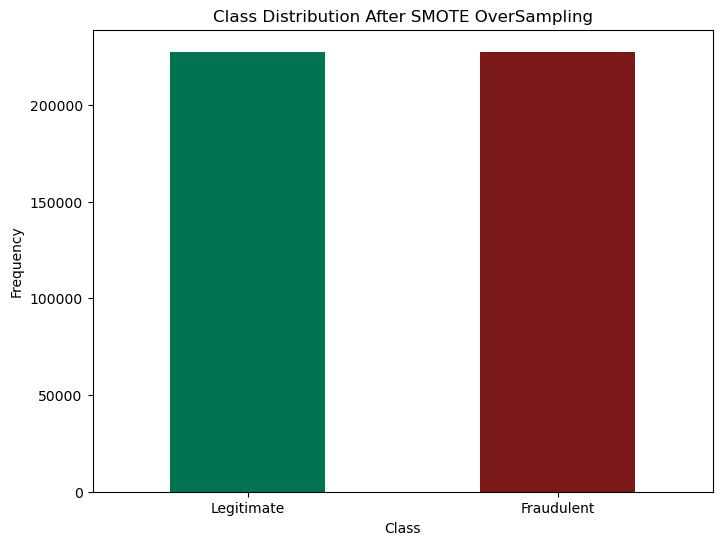

In [81]:
# Calculate the count of each class
over_sampled_class_distribution = y_train_over.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
over_sampled_class_distribution.plot(kind='bar', color=['#007451', '#7b1818'])
plt.title('Class Distribution After SMOTE OverSampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'], rotation=0)

# Save the plot as a file
plt.savefig('Class_Distribution_After_SMOTE_OverSampling.png')

# Show plot
plt.show()

### Data Balancing Using SMOTE

- **Balanced Classes:** The classes were balanced by incorporating more fraudulent transactions through the use of SMOTE (Synthetic Minority Over-sampling Technique).

- **SMOTE Algorithm:** The SMOTE algorithm created new examples of the minority class based on the existing ones and introduced in-between values.

- **New Dataset:** This generated a new dataset with the minority class consisting of 227,451 transactions.

This approach preserves all the valid transactions and improves the model’s performance since it contains more instances of fraud.

#### Logistic Regression : Using Over Sampling

In [79]:
# Logistic Regression on Over Sampled Data
log_reg_over = LogisticRegression(max_iter=1000, random_state=42)
log_reg_over.fit(X_train_over, y_train_over)
y_pred_log_reg_over = log_reg_over.predict(X_test)

In [80]:
print("Logistic Regression (Over Sampled) Balanced Report:")
print(classification_report(y_test, y_pred_log_reg_over))

Logistic Regression (Over Sampled) Balanced Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



### Logistic Regression (Over Sampled) Performance:

- **Accuracy:** The overall accuracy of the model is 98%, indicating that the model correctly classified 98% of the instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 0.98, indicating that out of all the actual legitimate transactions, 98% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 0.99, which is the harmonic mean of precision and recall, indicating an excellent balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for class 1 is 0.08, meaning that out of all the transactions predicted as fraudulent, only 8% were actually fraudulent. This low precision indicates a high number of false positives.
- **Recall:** The recall for class 1 is 0.91, indicating that out of all the actual fraudulent transactions, 91% were correctly identified by the model. This high recall shows that the model is good at identifying most of the fraudulent transactions, although at the cost of many false positives.
- **F1-Score:** The F1-score for class 1 is 0.14, which is low due to the significant imbalance between precision and recall for fraudulent transactions.

#### Decision Tree  : Using Over Sampling

In [85]:
# Decision Tree on Over Sampled Data
dec_tree_over = DecisionTreeClassifier(random_state=42)
dec_tree_over.fit(X_train_over, y_train_over)
y_pred_dec_tree_over = dec_tree_over.predict(X_test)

In [86]:
print("Decision Tree (Over Sampled) Balanced Report:")
print(classification_report(y_test, y_pred_dec_tree_over))

Decision Tree (Over Sampled) Balanced Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.82      0.61        98

    accuracy                           1.00     56962
   macro avg       0.74      0.91      0.80     56962
weighted avg       1.00      1.00      1.00     56962



### Decision Tree (Over Sampled) Performance:

- **Accuracy:** The overall accuracy of the model is 100%, indicating that the model correctly classified all instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 1.00, indicating that out of all the actual legitimate transactions, 100% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 1.00, which is the harmonic mean of precision and recall, indicating an excellent balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for class 1 is 0.48, meaning that out of all the transactions predicted as fraudulent, 48% were actually fraudulent. This precision indicates a moderate ability to correctly identify fraudulent transactions.
- **Recall:** The recall for class 1 is 0.82, indicating that out of all the actual fraudulent transactions, 82% were correctly identified by the model. This shows that the model is good at identifying a substantial portion of fraudulent transactions.
- **F1-Score:** The F1-score for class 1 is 0.61, which indicates a reasonable balance between precision and recall for fraudulent transactions.

### Improve the Models by Tuning Hyperparameters

#### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter tuning
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Apply grid search on the over-sampled training data
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_log_reg, cv=5, scoring='f1')
grid_search_log_reg.fit(X_train_over, y_train_over)

# Retrieve the best estimator
best_log_reg = grid_search_log_reg.best_estimator_

In [91]:
# Predictions with best models
y_pred_best_log_reg = best_log_reg.predict(X_test)

In [93]:
# Print classification reports for best models
print("Best Logistic Regression Report:")
print(classification_report(y_test, y_pred_best_log_reg))

Best Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



#### Hypertuned Logistic Regression Performance:

#### Accuracy
- The overall accuracy of the model is 98%, indicating that the model correctly classified the majority of instances in the dataset.

#### Class 0 (Legitimate Transactions)
- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 0.98, indicating that out of all the actual legitimate transactions, 98% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 0.99, which is the harmonic mean of precision and recall, indicating an excellent balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions)
- **Precision:** The precision for class 1 is 0.08, meaning that out of all the transactions predicted as fraudulent, only 8% were actually fraudulent. This low precision indicates a high number of false positives.
- **Recall:** The recall for class 1 is 0.91, indicating that out of all the actual fraudulent transactions, 91% were correctly identified by the model. This shows that the model captures most of the fraudulent transactions.
- **F1-Score:** The F1-score for class 1 is 0.14, which indicates a poor balance between precision and recall for fraudulent transactions.

#### Decision Tree  

In [97]:
# Decision Tree hyperparameter tuning
param_grid_dec_tree = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Apply grid search on the over-sampled training data
grid_search_dec_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dec_tree, cv=3, scoring='f1')
grid_search_dec_tree.fit(X_train_over, y_train_over)

# Retrieve the best estimator
best_dec_tree = grid_search_dec_tree.best_estimator_

In [129]:
y_pred_best_dec_tree = best_dec_tree.predict(X_test)

In [131]:
print("Best Decision Tree Report:")
print(classification_report(y_test, y_pred_best_dec_tree))

Best Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.85      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.92      0.76     56962
weighted avg       1.00      1.00      1.00     56962



#### Hypertuned Decision Tree Performance:

- **Accuracy:** The overall accuracy of the model is 100%, indicating that the model correctly classified all instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 1.00, indicating that out of all the actual legitimate transactions, 100% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 1.00, which is the harmonic mean of precision and recall, indicating an excellent balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for class 1 is 0.38, meaning that out of all the transactions predicted as fraudulent, 38% were actually fraudulent. This precision indicates a moderate ability to correctly identify fraudulent transactions.
- **Recall:** The recall for class 1 is 0.85, indicating that out of all the actual fraudulent transactions, 85% were correctly identified by the model. This shows that the model captures a substantial portion of fraudulent transactions.
- **F1-Score:** The F1-score for class 1 is 0.52, which indicates a moderate balance between precision and recall for fraudulent transactions.

## Results

<table>
    <thead>
        <tr>
            <th>Models</th>
            <th>Accuracy</th>
            <th colspan="2" align="center">Precision</th>
            <th colspan="2" align="center">Recall</th>
            <th colspan="2" align="center">F1-score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td></td>       
            <td></td>
            <td>Legitimate</td>
            <td>Fraud</td>
            <td>Legitimate</td>
            <td>Fraud</td>
            <td>Legitimate</td>
            <td>Fraud</td>
        </tr>
        <tr>
            <td align="left">Logistic Regression Imbalanced</td>
            <td align="center">100%</td>            
            <td align="center">100%</td>
            <td align="center">83%</td>
            <td align="center">100%</td>
            <td align="center">65%</td>
            <td align="center">100%</td>
            <td align="center">73%</td>
        </tr>
        <tr>
            <td align="left">Decision Tree Imbalanced</td>
            <td align="center">100%</td>
            <td align="center">100%</td>
            <td align="center">76%</td>
            <td align="center">100%</td>
            <td align="center">76%</td>
            <td align="center">100%</td>
            <td align="center">76%</td>
        </tr>
        <tr>
            <td align="left">Logistic Regression (Under Sampled)</td>
            <td align="center">96%</td>
            <td align="center">100%</td>
            <td align="center">4%</td>
            <td align="center">96%</td>
            <td align="center">92%</td>
            <td align="center">98%</td>
            <td align="center">7%</td>
        </tr>
        <tr>
            <td align="left">Decision Tree (Under Sampled)</td>
            <td align="center">90%</td>
            <td align="center">100%</td>
            <td align="center">2%</td>
            <td align="center">90%</td>
            <td align="center">91%</td>
            <td align="center">95%</td>
            <td align="center">3%</td>
        </tr>
        <tr>
            <td align="left">Logistic Regression (Over Sampled)</td>
            <td align="center">98%</td>
            <td align="center">100%</td>
            <td align="center">8%</td>
            <td align="center">98%</td>
            <td align="center">91%</td>
            <td align="center">99%</td>
            <td align="center">14%</td>
        </tr>
        <tr>
            <td align="left">Decision Tree (Over Sampled)</td>
            <td align="center">100%</td>
            <td align="center">100%</td>
            <td align="center">48%</td>
            <td align="center">100%</td>
            <td align="center">82%</td>
            <td align="center">100%</td>
            <td align="center">61%</td>
        </tr>
        <tr>
            <td align="left"><b>Best Model (Decision Tree)</b></td>
            <td align="center"><b>100%</b></td>
            <td align="center"><b>100%</b></td>
            <td align="center"><b>48%</b></td>
            <td align="center"><b>100%</b></td>
            <td align="center"><b>82%</b></td>
            <td align="center"><b>100%</b></td>
            <td align="center"><b>61%</b></td>
        </tr>
    </tbody>
</table>

### Best Model Performance with Over-Sampling  Report: 

When using over-sampling, all models showed better performance. More data helps improve the models' accuracy. The Decision Tree (Over Sampled) performed the best, achieving an full accuracy of 100%. This model worked exceptionally well with the dataset.

### Decision Tree (Over Sampled) Performance:

- **Accuracy:** The overall accuracy of the model is 100%, indicating that the model correctly classified all instances in the dataset.

#### Class 0 (Legitimate Transactions):

- **Precision:** The precision for class 0 is 1.00, meaning that out of all the transactions predicted as legitimate, 100% were actually legitimate.
- **Recall:** The recall for class 0 is 1.00, indicating that out of all the actual legitimate transactions, 100% were correctly identified by the model.
- **F1-Score:** The F1-score for class 0 is 1.00, which is the harmonic mean of precision and recall, indicating an excellent balance between the two for legitimate transactions.

#### Class 1 (Fraudulent Transactions):

- **Precision:** The precision for class 1 is 0.48, meaning that out of all the transactions predicted as fraudulent, 48% were actually fraudulent. This precision indicates a moderate ability to correctly identify fraudulent transactions.
- **Recall:** The recall for class 1 is 0.82, indicating that out of all the actual fraudulent transactions, 82% were correctly identified by the model. This shows that the model is good at identifying a substantial portion of fraudulent transactions.
- **F1-Score:** The F1-score for class 1 is 0.61, which indicates a reasonable balance between precision and recall for fraudulent transactions.

## Conclusion

The data was thoroughly investigated by:

- Checking for imbalances
- Visualizing the features
- Checking for null values
- Understanding the relationships between different features

The data was then split into train and test sets.

#### Model Performance:

- **Logistic Regression and Decision Tree Models:**
  - Both models performed well on the imbalanced dataset.
  - Achieved high precision and recall for legitimate transactions.
  - Showed lower performance for fraudulent transactions.

#### Improvements with Sampling Methods:

- **Under-Sampling and Over-Sampling:**
  - Improved the recall for fraudulent transactions.
  - Compromised precision and accuracy.

#### Fine-Tuning:

- Further fine-tuning of the models enhanced their performance.
- Positively impacted both legitimate and fraudulent transactions.